In [31]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouseLoad = "data/mouse_drug_data.csv"
clinicalLoad = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouseData = pd.read_csv(mouseLoad)
clinicalData = pd.read_csv(clinicalLoad)

# Combine the data into a single dataset
mergedData = pd.merge(clinicalData, mouseData, on ="Mouse ID")

# Display the data table for preview
mergedData.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [32]:
mergedData.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug'],
      dtype='object')

## Tumor Response to Treatment

In [33]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor = mergedData.groupby(["Drug", "Timepoint"])

mean = tumor["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
# Preview DataFrame
t = pd.DataFrame({"Mean:": mean})
t.head()

Mean:
Drug      Timepoint           
Capomulin 0          45.000000
          5          44.266086
          10         43.084291
          15         42.064317
          20         40.716325

In [34]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
error = tumor["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
errorDF = pd.DataFrame({"STD Error for Tumor Volume:": error})
# Preview DataFrame
errorDF.head()


STD Error for Tumor Volume:
Drug      Timepoint                             
Capomulin 0                             0.000000
          5                             0.448593
          10                            0.702684
          15                            0.838617
          20                            0.909731

In [35]:
#error

In [36]:
# Testing stuff
#errorForm = mergedData.pivot_table(values ='Tumor Volume (mm3)', index = 'Timepoint', columns = 'Drug').sem()
#errorForm = pd.DataFrame({"Timepoint": errorForm})
#errorForm

In [37]:
# Minor Data Munging to Re-Format the Data Frames
dataForm = mergedData.pivot_table(values='Tumor Volume (mm3)', index= 'Timepoint', columns = 'Drug')

# Preview that Reformatting worked
dataForm.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [38]:
dataForm.index

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

In [39]:
dataForm.columns

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

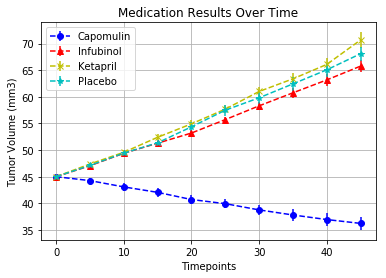

In [40]:
#variables for names
cap = "Capomulin"
infub = "Infubinol"
keta = "Ketapril"
plac = "Placebo"

# my x axis 
x = dataForm.index

# Capomulin 
capY = dataForm["Capomulin"]
#capy = dataForm.Capomulin this also works as well shown from https://www.youtube.com/watch?v=e60ItwlZTKM

# y error
capError = error.loc["Capomulin",:]
plt.errorbar(x, capY, fmt = 'o', ls = 'dashed', color = 'b', yerr = capError)

# Infubinol
infubY = dataForm["Infubinol"]
infubError = error.loc["Infubinol",:]
plt.errorbar(x, infubY, fmt = '^', ls = 'dashed', color = 'r', yerr = infubError)

# Ketapril
ketaY = dataForm["Ketapril"]
ketaError = error.loc["Ketapril",:]
plt.errorbar(x, ketaY, fmt = 'x', ls = 'dashed', color = 'y', yerr = ketaError)

# Placebo
placebo = dataForm["Placebo"]
placeboError = error.loc["Placebo",:]
plt.errorbar(x, placebo, fmt = '*', ls = 'dashed', color = 'c', yerr = placeboError)

# Generate the Plot (with Error Bars)
# Save the Figure
plt.show
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc = "best")
plt.title("Medication Results Over Time")
plt.grid()

In [41]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [42]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metaMean = tumor["Metastatic Sites"].mean()
# Convert to DataFrame
metaData = pd.DataFrame({"Metastatic Means:": metaMean})
# Preview DataFrame
metaData.head()

Metastatic Means:
Drug      Timepoint                   
Capomulin 0                   0.000000
          5                   0.160000
          10                  0.320000
          15                  0.375000
          20                  0.652174

In [43]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metaError = tumor["Metastatic Sites"].sem()
# Convert to DataFrame
metaErrorDF = pd.DataFrame({"Metastatic Standard Error:": metaError})
# Preview DataFrame
metaErrorDF.head()

Metastatic Standard Error:
Drug      Timepoint                            
Capomulin 0                            0.000000
          5                            0.074833
          10                           0.125433
          15                           0.132048
          20                           0.161621

In [44]:
# Minor Data Munging to Re-Format the Data Frames
# Looking at Metastatic Sites Now
metaForm = mergedData.pivot_table(values = "Metastatic Sites", index = "Timepoint", columns = "Drug")
# Preview that Reformatting worked
metaForm

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [45]:
metaForm.columns

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

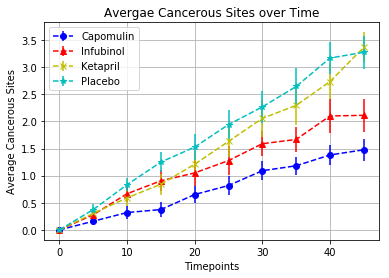

In [46]:
xMeta = metaForm.index
# Generate the Plot (with Error Bars)
capMetaY = metaForm[cap]
capMetaError = metaError.loc[cap,:]
plt.errorbar(xMeta, capMetaY, color = 'b', ls = 'dashed', yerr = capMetaError, fmt = 'o')

# infubinol
infubMetaY = metaForm[infub]
infubMetaError = metaError.loc[infub,:]
plt.errorbar(xMeta, infubMetaY, color = 'r', ls = 'dashed', yerr = infubMetaError, fmt = '^')

# Ketapril
ketaMetaY = metaForm[keta]
ketaMetaError = metaError.loc[keta,:]
plt.errorbar(xMeta, ketaMetaY, color = 'y', ls = 'dashed', yerr = ketaMetaError, fmt = 'x')

# placebo
placeboMetaY = metaForm[plac]
placeboMetaError = metaError.loc[plac, :]
plt.errorbar(xMeta, placeboMetaY, color = 'c', ls = 'dashed', yerr = placeboMetaError, fmt = '*')

# Save the Figure

# Show the Figure
plt.legend()
plt.xlabel('Timepoints')
plt.ylabel('Average Cancerous Sites')
plt.title('Avergae Cancerous Sites over Time')
plt.grid()
plt.show()

## Survival Rates

In [47]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
#mice = tumor["Mouse ID"].value_counts()
mice = tumor["Mouse ID"].count()
miceDF = pd.DataFrame({"Fallen Heroes Count:": mice})
miceDF
# Convert to DataFrame

# Preview DataFrame


Fallen Heroes Count:
Drug      Timepoint                      
Capomulin 0                            25
          5                            25
          10                           25
          15                           24
          20                           23
          25                           22
          30                           22
          35                           22
          40                           21
          45                           21
Ceftamin  0                            25
          5                            21
          10                           20
          15                           19
          20                           18
          25                           18
          30                           16
          35                           14
          40                           14
          45                           13
Infubinol 0                            25
          5                            25
          10                           21
          15                           21
          20                           20
          25                           18
          30                           17
          35                           12
          40                           10
          45                            9
...                                   ...
Ramicane  0                            25
          5                            25
          10                           24
          15                           24
          20                           23
          25                           23
          30                           23
          35                           21
          40                           20
          45                           20
Stelasyn  0                            26
          5                            25
          10                           23
          15                           23
          20                           21
          25                           19
          30                           18
          35                           16
          40                           12
          45                           11
Zoniferol 0                            25
          5                            24
          10                           22
          15                           21
          20                           17
          25                           16
          30                           15
          35                           14
          40                           14
          45                           14

[100 rows x 1 columns]

In [48]:
# Minor Data Munging to Re-Format the Data Frames
miceForm = miceDF.unstack(level=0)
miceForm
# Preview the Data Frame


Fallen Heroes Count:                                               \
Drug                 Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo   
Timepoint                                                                     
0                           25       25        25       25       25      25   
5                           25       21        25       23       23      24   
10                          25       20        21       22       21      24   
15                          24       19        21       19       21      20   
20                          23       18        20       19       20      19   
25                          22       18        18       19       18      17   
30                          22       16        17       18       15      15   
35                          22       14        12       17       15      14   
40                          21       14        10       15       15      12   
45                          21       13         9       11       13      11   

                                                
Drug      Propriva Ramicane Stelasyn Zoniferol  
Timepoint                                       
0               26       25       26        25  
5               25       25       25        24  
10              23       24       23        22  
15              17       24       23        21  
20              17       23       21        17  
25              14       23       19        16  
30              13       23       18        15  
35              10       21       16        14  
40               9       20       12        14  
45               7       20       11        14

In [49]:
# This won't work because it compares the next item to the item before, so it could say 100% even when there are 2 dead
# since the number before it didn't change from n+1
#pct = miceForm.pct_change()+1
#pct

In [50]:
#https://stackoverflow.com/questions/35090498/how-to-calculate-percent-change-compared-to-the-beginning-value-using-pandas
#added the .add(100)

micePCT = miceForm.apply(lambda x: x.div(x.iloc[0]).subtract(1).mul(100).add(100))
micePCT

Fallen Heroes Count:                                               \
Drug                 Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo   
Timepoint                                                                     
0                        100.0    100.0     100.0    100.0    100.0   100.0   
5                        100.0     84.0     100.0     92.0     92.0    96.0   
10                       100.0     80.0      84.0     88.0     84.0    96.0   
15                        96.0     76.0      84.0     76.0     84.0    80.0   
20                        92.0     72.0      80.0     76.0     80.0    76.0   
25                        88.0     72.0      72.0     76.0     72.0    68.0   
30                        88.0     64.0      68.0     72.0     60.0    60.0   
35                        88.0     56.0      48.0     68.0     60.0    56.0   
40                        84.0     56.0      40.0     60.0     60.0    48.0   
45                        84.0     52.0      36.0     44.0     52.0    44.0   

                                                      
Drug         Propriva Ramicane    Stelasyn Zoniferol  
Timepoint                                             
0          100.000000    100.0  100.000000     100.0  
5           96.153846    100.0   96.153846      96.0  
10          88.461538     96.0   88.461538      88.0  
15          65.384615     96.0   88.461538      84.0  
20          65.384615     92.0   80.769231      68.0  
25          53.846154     92.0   73.076923      64.0  
30          50.000000     92.0   69.230769      60.0  
35          38.461538     84.0   61.538462      56.0  
40          34.615385     80.0   46.153846      56.0  
45          26.923077     80.0   42.307692      56.0

In [51]:
micePCT.columns

MultiIndex(levels=[['Fallen Heroes Count:'], ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
           names=[None, 'Drug'])

In [52]:
#https://stackoverflow.com/questions/25189575/pandas-dataframe-select-columns-in-multiindex
# this swaps the multi level index so that i can call by drug name 
micePCTnew = micePCT.swaplevel(0,1,axis =1)
micePCTnew.columns
#micePCTnew

MultiIndex(levels=[['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], ['Fallen Heroes Count:']],
           codes=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
           names=['Drug', None])

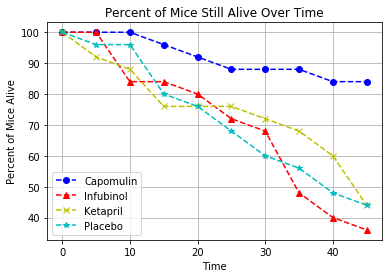

In [53]:
# Generate the Plot (Accounting for percentages)
# I realized that these are all errorbars
capMiceY = micePCTnew.loc[:, cap]
plt.errorbar(x, capMiceY, color = 'b', ls = 'dashed', fmt = 'o')

infubMiceY = micePCTnew.loc[:, infub]
plt.errorbar(x, infubMiceY, color = 'r', ls = 'dashed', fmt = '^')

ketaMiceY = micePCTnew.loc[:, keta]
plt.errorbar(x, ketaMiceY, color = 'y', ls = 'dashed', fmt = 'x')

placeboMiceY = micePCTnew.loc[:, plac]
plt.errorbar(x, placeboMiceY, color = 'c', ls = 'dashed', fmt = '*')
# Save the Figure

# Show the Figure
plt.legend([cap, infub, keta, plac])
plt.xlabel("Time")
plt.ylabel("Percent of Mice Alive")
plt.title("Percent of Mice Still Alive Over Time")
plt.grid()
plt.show()

## Summary Bar Graph

In [54]:
# Calculate the percent changes for each drug
#tumorPCT = dataForm.apply(lambda x: x.div(x.iloc[0]).subtract(1).mul(100))
# Display the data to confirm
#tumorPCT
#tumorPCT.tail(1)

In [55]:
#tumorPCT.columns

In [56]:
tumorPCT = dataForm.apply(lambda x: x.div(x.iloc[0]).subtract(1).mul(100))
tumorPCT

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,-1.630919,3.340113,4.582225,5.309277,3.991329,4.723532,4.997705,-2.344757,5.616559,4.115152
10,-4.257132,7.300278,9.786463,10.182820,8.209355,9.829621,9.114535,-5.484539,9.919653,8.199737
15,-6.523739,11.320122,13.991992,16.444386,13.184485,14.132759,13.482930,-7.788754,14.509797,12.842353
20,-9.519277,15.904552,18.217091,22.046522,19.209083,20.809816,18.548305,-10.581500,20.149766,18.156297
25,-11.245494,20.639276,23.811672,28.175515,26.071039,27.739053,23.342528,-13.390445,24.813607,23.184300
30,-13.845913,26.154483,29.554216,35.543349,32.354463,32.909029,29.325276,-13.993028,32.948306,28.252291
35,-15.962580,30.727884,34.983247,40.825969,39.300193,38.712478,34.111553,-16.773341,38.757110,33.531938
40,-17.871109,36.595323,40.361832,46.819067,45.779453,44.561500,40.101193,-18.724265,45.236413,39.814871


In [57]:
lastList = [tumorPCT.iloc[-1, tumorPCT.columns.get_loc(cap)],tumorPCT.iloc[-1, tumorPCT.columns.get_loc(infub)],
            tumorPCT.iloc[-1, tumorPCT.columns.get_loc(keta)], tumorPCT.iloc[-1, tumorPCT.columns.get_loc(plac)]]
#capFinalPCT = tumorPCT.iloc[-1, tumorPCT.columns.get_loc(cap)]
#infubFinalPCT = tumorPCT.iloc[-1, tumorPCT.columns.get_loc(infub)]
#lastList.append(capFinalPCT)
#lastList.append(infubFinalPCT)
lastList

[-19.475302667894155, 46.12347172785185, 57.02879468660604, 51.29796048315151]

Text(0.5, 1.0, 'Percent of Mice Alive By End')

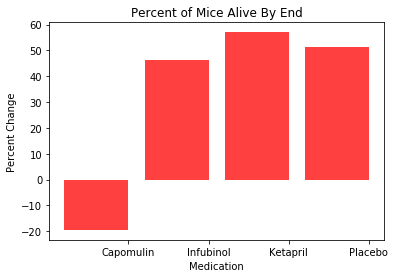

In [64]:
# Store all Relevant Percent Changes into a Tuple
tSlice = tuple(lastList)
yTest = [30, 50, 70, 90]
xNames = [cap, infub, keta, plac]
x_axisLen = np.arange(0, len(xNames))
plt.bar(x_axisLen, lastList, facecolor="red", alpha=0.75, align="edge", width = -.80)
tick_locations = []
for x in x_axisLen:
    tick_locations.append(x)
plt.xticks(tick_locations, xNames)

plt.xlabel("Medication")
plt.ylabel("Percent Change")
plt.title("Percent of Mice Alive By End")
# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
#fig.show()

In [59]:
#https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
# look at this for info on adding percents into stuff

In [60]:
#pctChange = mean.apply(lambda x: x.div(x.iloc[0]).subtract(1).mul(100))
#pctChange

In [61]:
#listTry = [(tumorPCT.iloc[-1, tumorPCT.columns.get_loc(cap)]),(tumorPCT.iloc[-1, tumorPCT.columns.get_loc(infub)]) ]
#listTry